In [15]:
import numpy as np

In [16]:
cil_observado = np.array([1200,2230,1650,1220,2560,900,1480])
consumo_observado = np.array([.06,.1,.11,.05,.1,.07,.11])

In [17]:
regressores = cil_observado.reshape((-1,1))
regressores

array([[1200],
       [2230],
       [1650],
       [1220],
       [2560],
       [ 900],
       [1480]])

In [18]:
features = variaveis_independentes = regressores
alvos = variaveis_dependentes = variaveis_respostas = variaveis_de_desfecho = consumo_observado

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
modelo = LinearRegression().fit(regressores,consumo_observado)

In [21]:
modelo.coef_ # Coeficiente angular do modelo

array([2.62359965e-05])

In [22]:
f'{modelo.coef_[0]:.20f}'

'0.00002623599651170592'

In [23]:
modelo.intercept_

0.043586771315489374

In [24]:
consumo_estimado = modelo.predict(regressores)

In [25]:
consumo_estimado

array([0.07506997, 0.10209304, 0.08687617, 0.07559469, 0.11075092,
       0.06719917, 0.08241605])

In [26]:
erros_lineares = consumo_observado - consumo_estimado

In [27]:
erros_lineares

array([-0.01506997, -0.00209304,  0.02312383, -0.02559469, -0.01075092,
        0.00280083,  0.02758395])

In [28]:
erro_quadratico_medio = np.mean(np.square(erros_lineares))
erro_quadratico_medio

0.0003293694237606495

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(consumo_observado, modelo.predict(regressores))

0.0003293694237606495

In [30]:
cilindradas_das_opcoes_de_compra = np.array([1356,2544])

In [31]:
preditores_de_compra = cilindradas_das_opcoes_de_compra.reshape((-1,1))
preditores_de_compra

array([[1356],
       [2544]])

In [32]:
modelo.predict(preditores_de_compra)

array([0.07916278, 0.11033115])

In [33]:
1/modelo.predict(preditores_de_compra)

array([12.63219871,  9.06362376])

In [34]:
import pandas as pd
ds = pd.read_csv("indicadores_orgao_julgador_ativo_jun2022.csv")

In [35]:
ds.head()

,Unnamed: 0,id_orgao_julgador,sigla_tribunal,ramo_justica,nome_orgao,uf,id_municipio,ind1,ind2,ind3,taxa_entrada,taxa_saida,retorno,log_ind1,log_ind2,log_ind3,log_taxa_entrada,log_taxa_saida,log_retorno
0,0,10000,TJSP,Justiça Estadual,03 CIVEL DE OURINHOS,SP,5197,190,4414,159,0.043045,0.036022,0.836842,2.278754,3.644832,2.201397,-1.366079,-1.443435,-0.077356
1,1,10001,TJSP,Justiça Estadual,SAF DE OURINHOS,SP,5197,18,55729,666,0.000323,0.011951,37.000000,1.255273,4.746081,2.823474,-3.490809,-1.922607,1.568202
2,2,10002,TJSP,Justiça Estadual,01 CRIMINAL DE OURINHOS,SP,5197,87,2207,138,0.039420,0.062528,1.586207,1.939519,3.343802,2.139879,-1.404283,-1.203923,0.200360
3,3,10003,TJSP,Justiça Estadual,02 CRIMINAL DE OURINHOS,SP,5197,72,2283,138,0.031537,0.060447,1.916667,1.857332,3.358506,2.139879,-1.501173,-1.218627,0.282547
4,4,10004,TJSP,Justiça Estadual,JUIZADO ESPECIAL CIVEL CRIM. DE PACAEMBU,SP,5200,186,699,191,0.266094,0.273247,1.026882,2.269513,2.844477,2.281033,-0.574964,-0.563444,0.011520


In [36]:
ds.columns

Index(['Unnamed: 0', 'id_orgao_julgador', 'sigla_tribunal', 'ramo_justica',
       'nome_orgao', 'uf', 'id_municipio', 'ind1', 'ind2', 'ind3',
       'taxa_entrada', 'taxa_saida', 'retorno', 'log_ind1', 'log_ind2',
       'log_ind3', 'log_taxa_entrada', 'log_taxa_saida', 'log_retorno'],
      dtype='object')

In [37]:
ds.id_orgao_julgador.value_counts()

10000    1
59861    1
59843    1
59845    1
59846    1
        ..
22301    1
22302    1
22303    1
22304    1
9999     1
Name: id_orgao_julgador, Length: 14900, dtype: int64

In [38]:
ds.sigla_tribunal.value_counts()

TJSP      2105
TJMG      1023
TJRS       869
TJPR       661
TJBA       645
          ... 
TSE          8
TRE-SE       7
TRE-RR       7
TRE-AC       5
TRE-DF       2
Name: sigla_tribunal, Length: 90, dtype: int64

In [39]:
ds.sigla_tribunal.unique()

array(['TJSP', 'TJPE', 'TJMG', 'TJRS', 'TJCE', 'TJPR', 'TJAC', 'TJMA',
       'TJRN', 'TJES', 'TJPI', 'TJMT', 'TJGO', 'TJSC', 'TJAM', 'TJSE',
       'TJPA', 'TJAP', 'TJAL', 'TJBA', 'TRF2', 'TRF4', 'TRF1', 'TJDFT',
       'TRF5', 'TRF3', 'STJ', 'TJRR', 'TJMS', 'TJRO', 'TJPB', 'TJMRS',
       'TJTO', 'TJMMG', 'TRE-SE', 'TRE-PB', 'TRE-AM', 'TRE-PI', 'TRE-MS',
       'TRE-DF', 'TRE-SC', 'TRE-SP', 'TRE-RJ', 'TRE-PR', 'TRE-RO',
       'TJMSP', 'TRE-MG', 'TRE-GO', 'TRE-MT', 'TRE-AL', 'TRE-TO',
       'TRE-BA', 'TRT20', 'TRT15', 'TRT3', 'TRT12', 'TRT13', 'TRT16',
       'TRT5', 'TRT9', 'TRT8', 'TRT6', 'TRT24', 'TRT17', 'TRT21',
       'TRE-RS', 'TRT23', 'TRT10', 'TRT11', 'TRE-PE', 'TRT18', 'TRT2',
       'TRT22', 'TRT14', 'TRE-PA', 'STM', 'TRE-CE', 'TRT1', 'TRT7',
       'TRE-RN', 'TRE-AP', 'TST', 'TRT4', 'TRT19', 'TRE-MA', 'TRE-ES',
       'TRE-RR', 'TRE-AC', 'TSE', 'CJF'], dtype=object)

In [40]:
ds_tribunal = (ds.groupby(['sigla_tribunal','ramo_justica'],
                          as_index=False)[['ind1','ind2','ind3']].sum())
ds_tribunal

,sigla_tribunal,ramo_justica,ind1,ind2,ind3
0,CJF,Justiça Federal,1640,4099,1606
1,STJ,Tribunais Superiores,37809,282486,38861
2,STM,Justiça Militar da União,68,2468,101
3,TJAC,Justiça Estadual,5895,125991,5242
4,TJAL,Justiça Estadual,12708,534984,75382
...,...,...,...,...,...
85,TRT7,Justiça do Trabalho,6886,112808,8246
86,TRT8,Justiça do Trabalho,7350,70585,7955
87,TRT9,Justiça do Trabalho,15150,337920,15564
88,TSE,Tribunais Superiores,260,2669,122


In [41]:
ds_tribunal

,sigla_tribunal,ramo_justica,ind1,ind2,ind3
0,CJF,Justiça Federal,1640,4099,1606
1,STJ,Tribunais Superiores,37809,282486,38861
2,STM,Justiça Militar da União,68,2468,101
3,TJAC,Justiça Estadual,5895,125991,5242
4,TJAL,Justiça Estadual,12708,534984,75382
...,...,...,...,...,...
85,TRT7,Justiça do Trabalho,6886,112808,8246
86,TRT8,Justiça do Trabalho,7350,70585,7955
87,TRT9,Justiça do Trabalho,15150,337920,15564
88,TSE,Tribunais Superiores,260,2669,122


In [42]:
ds_tribunal.describe()

,ind1,ind2,ind3
count,90.000000,9.000000e+01,90.000000
mean,25384.555556,7.419532e+05,26677.933333
std,55559.374899,2.169591e+06,53289.043184
min,24.000000,1.410000e+02,7.000000
25%,97.500000,1.540750e+03,184.750000
50%,5367.000000,8.487250e+04,5673.500000
75%,32242.000000,6.893940e+05,31792.750000
max,462976.000000,1.908296e+07,423359.000000


In [43]:
import seaborn as sb

<Axes: xlabel='ind1', ylabel='ramo_justica'>

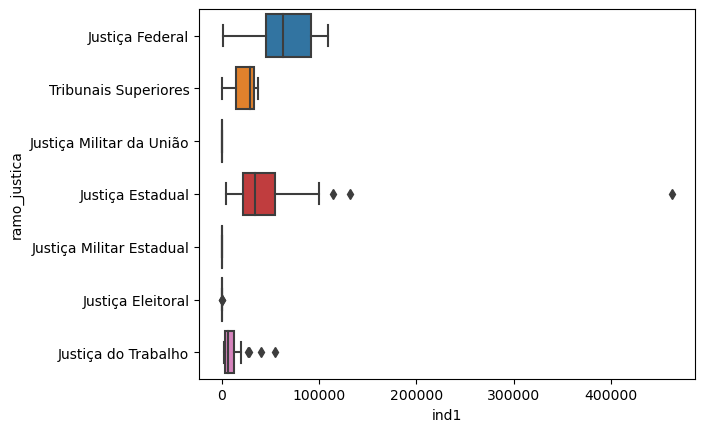

In [44]:
sb.boxplot(data=ds_tribunal, y = 'ramo_justica', x = 'ind1', orient = 'h')

In [45]:
ds_tribunal['log_ind1'] = np.log10(ds_tribunal.ind1)
ds_tribunal['log_ind2'] = np.log10(ds_tribunal.ind2)
ds_tribunal['log_ind3'] = np.log10(ds_tribunal.ind3)
ds_tribunal.describe()

,ind1,ind2,ind3,log_ind1,log_ind2,log_ind3
count,90.000000,9.000000e+01,90.000000,90.000000,90.000000,90.000000
mean,25384.555556,7.419532e+05,26677.933333,3.419996,4.638487,3.493224
std,55559.374899,2.169591e+06,53289.043184,1.240071,1.382164,1.205873
min,24.000000,1.410000e+02,7.000000,1.380211,2.149219,0.845098
25%,97.500000,1.540750e+03,184.750000,1.988853,3.187720,2.266168
50%,5367.000000,8.487250e+04,5673.500000,3.727620,4.926726,3.752591
75%,32242.000000,6.893940e+05,31792.750000,4.508156,5.838249,4.502299
max,462976.000000,1.908296e+07,423359.000000,5.665558,7.280646,5.626709


In [46]:
import matplotlib.pyplot as plt 

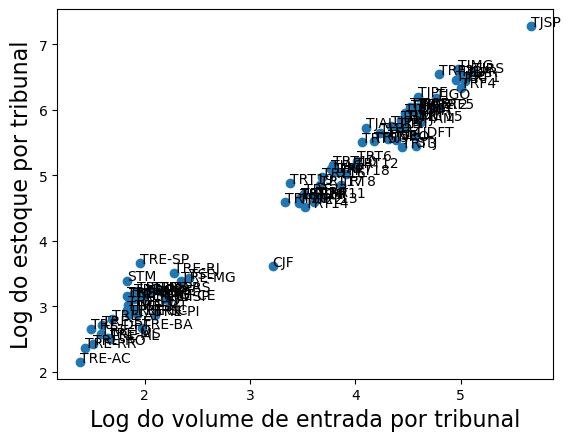

In [48]:
plt.scatter(ds_tribunal.log_ind1, ds_tribunal.log_ind2)
for i, txt in enumerate(ds_tribunal.sigla_tribunal):
    plt.annotate(txt, (ds_tribunal.log_ind1[i], ds_tribunal.log_ind2[i]))
plt.xlabel("Log do volume de entrada por tribunal",fontsize=16)
plt.ylabel("Log do estoque por tribunal",fontsize=16)
plt.show()

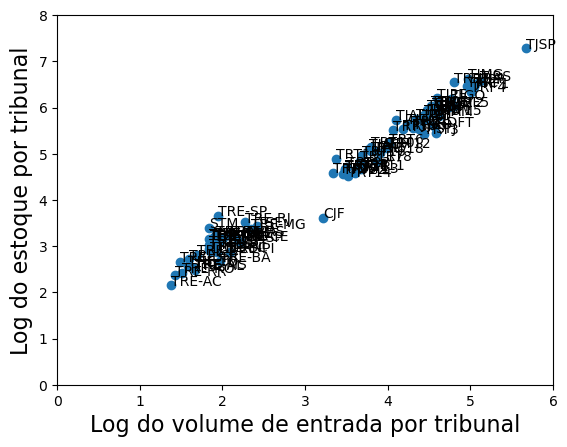

In [49]:
plt.xlim(0,6)
plt.ylim(0,8)
plt.scatter(ds_tribunal.log_ind1, ds_tribunal.log_ind2)
for i, txt in enumerate(ds_tribunal.sigla_tribunal):
    plt.annotate(txt, (ds_tribunal.log_ind1[i], ds_tribunal.log_ind2[i]))
plt.xlabel("Log do volume de entrada por tribunal", fontsize=16)
plt.ylabel("Log do estoque por tribunal", fontsize=16)
plt.show()

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
# Primeiramente, montamos uma tripla com os dados usando a função zip()
data = list(zip(ds_tribunal.log_ind1, ds_tribunal.log_ind2, ds_tribunal.log_ind3))

# Aplicamos a clusterização aglomerativa, informando que queremos 7 clusters, por afinidade euclidiana
hierarchical_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')

# Obtemos a classificação dos tribunais no vetor labels
labels = hierarchical_cluster.fit_predict(data)

# Imprimimos a lista de labels para cada tribunal
print(labels)
print(ds_tribunal.sigla_tribunal.values)

[2 0 6 5 0 0 5 1 0 0 0 0 0 1 6 6 0 3 0 0 0 0 0 1 0 0 2 1 1 0 1 0 4 4 3 6 6
 3 4 6 6 3 3 4 6 3 6 3 6 6 3 6 4 4 3 6 4 3 4 1 0 1 1 0 0 5 2 5 2 2 0 5 2 5
 2 0 2 2 2 2 2 0 0 0 5 5 5 0 3 0]
['CJF' 'STJ' 'STM' 'TJAC' 'TJAL' 'TJAM' 'TJAP' 'TJBA' 'TJCE' 'TJDFT'
 'TJES' 'TJGO' 'TJMA' 'TJMG' 'TJMMG' 'TJMRS' 'TJMS' 'TJMSP' 'TJMT' 'TJPA'
 'TJPB' 'TJPE' 'TJPI' 'TJPR' 'TJRN' 'TJRO' 'TJRR' 'TJRS' 'TJSC' 'TJSE'
 'TJSP' 'TJTO' 'TRE-AC' 'TRE-AL' 'TRE-AM' 'TRE-AP' 'TRE-BA' 'TRE-CE'
 'TRE-DF' 'TRE-ES' 'TRE-GO' 'TRE-MA' 'TRE-MG' 'TRE-MS' 'TRE-MT' 'TRE-PA'
 'TRE-PB' 'TRE-PE' 'TRE-PI' 'TRE-PR' 'TRE-RJ' 'TRE-RN' 'TRE-RO' 'TRE-RR'
 'TRE-RS' 'TRE-SC' 'TRE-SE' 'TRE-SP' 'TRE-TO' 'TRF1' 'TRF2' 'TRF3' 'TRF4'
 'TRF5' 'TRT1' 'TRT10' 'TRT11' 'TRT12' 'TRT13' 'TRT14' 'TRT15' 'TRT16'
 'TRT17' 'TRT18' 'TRT19' 'TRT2' 'TRT20' 'TRT21' 'TRT22' 'TRT23' 'TRT24'
 'TRT3' 'TRT4' 'TRT5' 'TRT6' 'TRT7' 'TRT8' 'TRT9' 'TSE' 'TST']


c:\Users\bruno.g.toledo\AppData\Local\anaconda3_2\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


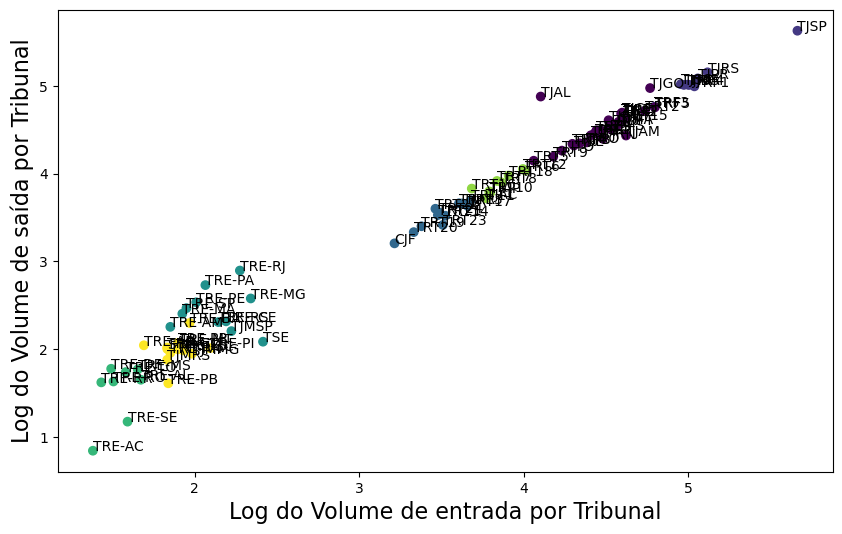

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(ds_tribunal.log_ind1, ds_tribunal.log_ind3, c=labels)
for i, txt in enumerate(ds_tribunal.sigla_tribunal):
    plt.annotate(txt, (ds_tribunal.log_ind1[i], ds_tribunal.log_ind3[i]))
plt.xlabel("Log do Volume de entrada por Tribunal", fontsize=16)
plt.ylabel("Log do Volume de saída por Tribunal", fontsize=16)
plt.show()

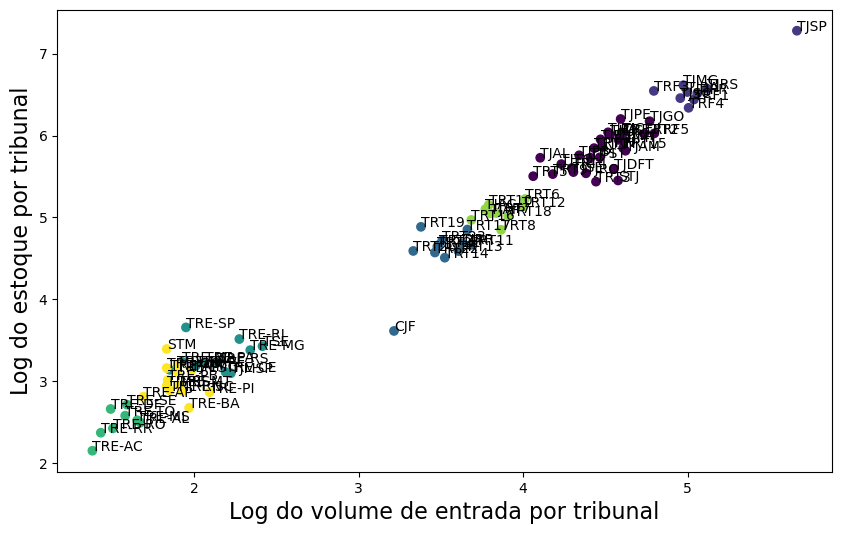

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(ds_tribunal.log_ind1, ds_tribunal.log_ind2, c=labels)
for i, txt in enumerate(ds_tribunal.sigla_tribunal):
    plt.annotate(txt, (ds_tribunal.log_ind1[i], ds_tribunal.log_ind2[i]))
plt.xlabel("Log do volume de entrada por tribunal", fontsize=16)
plt.ylabel("Log do estoque por tribunal", fontsize=16)
plt.show()

In [62]:
ds_tribunal['Cluster'] = labels
ds_tribunal

,sigla_tribunal,ramo_justica,ind1,ind2,ind3,log_ind1,log_ind2,log_ind3,Cluster
0,CJF,Justiça Federal,1640,4099,1606,3.214844,3.612678,3.205746,2
1,STJ,Tribunais Superiores,37809,282486,38861,4.577595,5.450997,4.589514,0
2,STM,Justiça Militar da União,68,2468,101,1.832509,3.392345,2.004321,6
3,TJAC,Justiça Estadual,5895,125991,5242,3.770484,5.100340,3.719497,5
4,TJAL,Justiça Estadual,12708,534984,75382,4.104077,5.728341,4.877268,0
...,...,...,...,...,...,...,...,...,...
85,TRT7,Justiça do Trabalho,6886,112808,8246,3.837967,5.052340,3.916243,5
86,TRT8,Justiça do Trabalho,7350,70585,7955,3.866287,4.848712,3.900640,5
87,TRT9,Justiça do Trabalho,15150,337920,15564,4.180413,5.528814,4.192121,0
88,TSE,Tribunais Superiores,260,2669,122,2.414973,3.426349,2.086360,3


c:\Users\bruno.g.toledo\AppData\Local\anaconda3_2\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


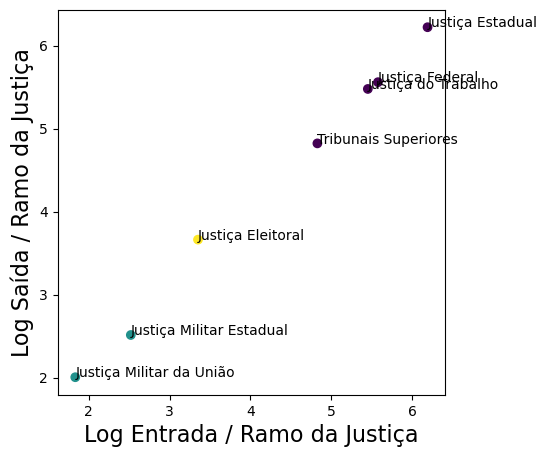

In [66]:
ds_ramo_justica = (ds.groupby(['ramo_justica'],
                              as_index=False)[['ind1','ind2','ind3']].sum())
ds_ramo_justica['log_ind1'] = np.log10(ds_ramo_justica.ind1)
ds_ramo_justica['log_ind2'] = np.log10(ds_ramo_justica.ind2)
ds_ramo_justica['log_ind3'] = np.log10(ds_ramo_justica.ind3)

data = list(zip(ds_ramo_justica.log_ind1, ds_ramo_justica.log_ind2, ds_ramo_justica.log_ind3))

# Aplicamos a clusterização aglomerativa, informando que queremos 3 clusters, por afinidade euclideana
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Obtemos a classificação dos tribunais no vetor labels
labels = hierarchical_cluster.fit_predict(data)

plt.figure(figsize=(5, 5))
plt.scatter(ds_ramo_justica.log_ind1, ds_ramo_justica.log_ind3, c=labels)
for i, txt in enumerate(ds_ramo_justica.ramo_justica):
    plt.annotate(txt, (ds_ramo_justica.log_ind1[i], ds_ramo_justica.log_ind3[i]))
plt.xlabel("Log Entrada / Ramo da Justiça", fontsize=16)
plt.ylabel("Log Saída / Ramo da Justiça", fontsize=16)
plt.show()